# Working on Netflix Movies and TV Shows dataset

------

# 1. Loading and Understanding the Dataset

importing libraries

In [135]:
# !pip install --upgrade pandas


In [136]:
# import pandas as pd
# print(pd.__version__)


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats


Importing dataset

In [138]:
data = pd.read_csv('netflix_titles.csv')
df = pd.DataFrame(data)

Understanding and analysing the dataset

In [139]:
df. shape

(8807, 12)

In [140]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [142]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [143]:
df.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


skewness

In [144]:
skew_values = df.select_dtypes(include=['int64', 'float64']).skew()
print("Skewness of numerical features:\n", skew_values)

Skewness of numerical features:
 release_year   -3.446565
dtype: float64


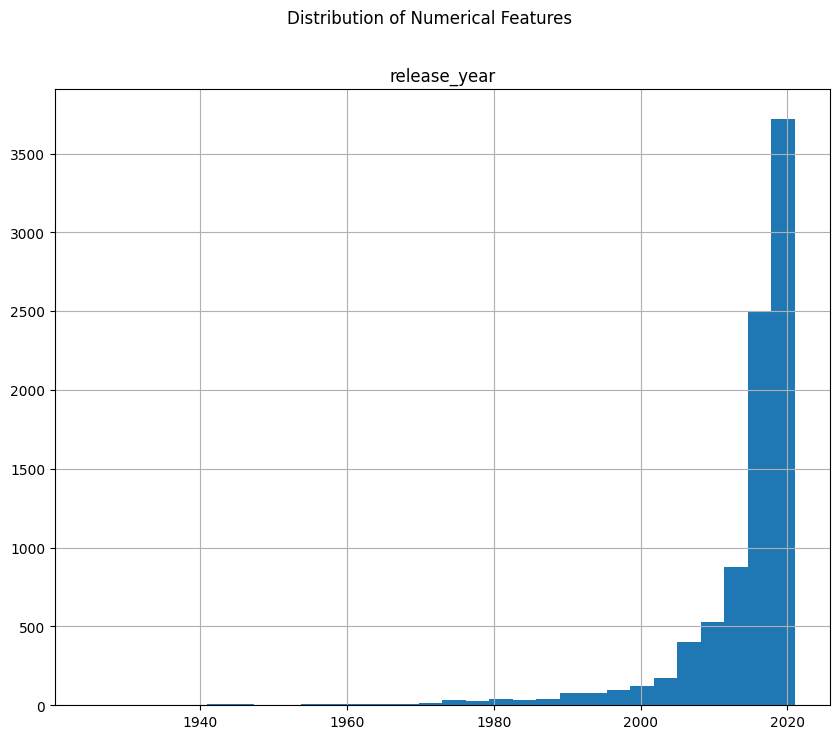

In [145]:
# plotting histogram
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(10, 8), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

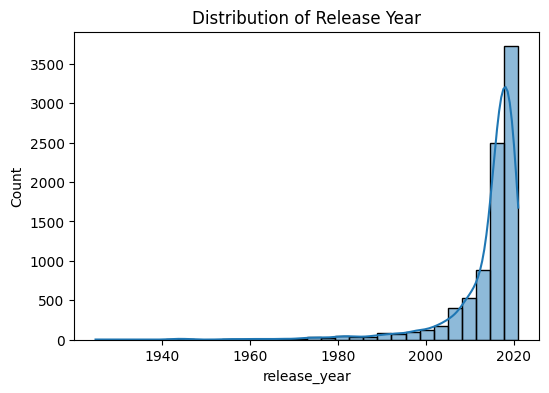

In [146]:
plt.figure(figsize=(6, 4))
sns.histplot(df["release_year"], kde=True, bins=30)
plt.title("Distribution of Release Year")
plt.show()

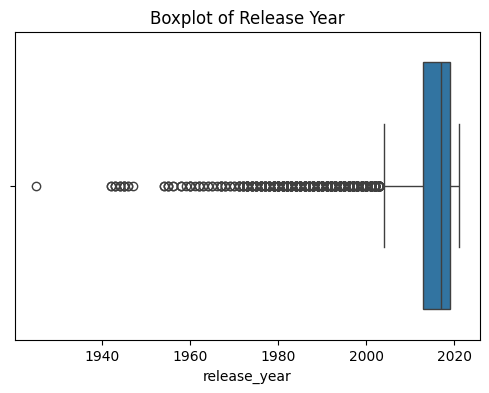

In [147]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["release_year"])
plt.title("Boxplot of Release Year")
plt.show()


/tmp/ipykernel_22338/3024346605.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["release_year"], shade=False, ax=axes[1])


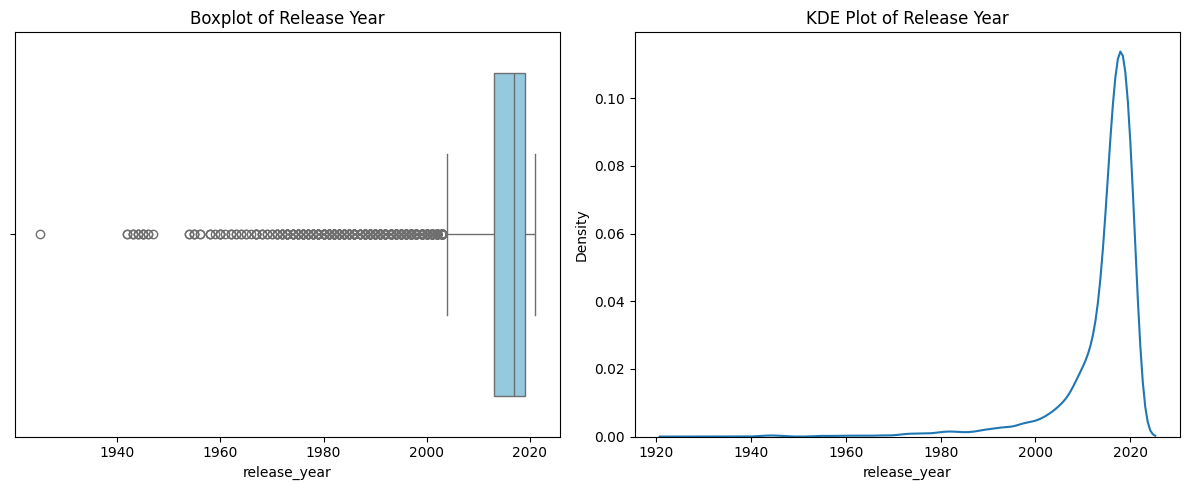

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df["release_year"], ax=axes[0], color="skyblue")
axes[0].set_title("Boxplot of Release Year")

sns.kdeplot(df["release_year"], shade=False, ax=axes[1])
axes[1].set_title("KDE Plot of Release Year")

plt.tight_layout()
plt.show()


As this is categorical data so skewness has no application or effect here....

Also outliers are of previous years and recent years hence cant be considered as meaningless consideration in case of categorical data

-----------

## Handling missing values

In [149]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [150]:
df.isnull().sum().sum()

4307

Analysing percent of missing values, if more then remove column, else impute

In [151]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
# missing_values, missing_percent

missing_df = pd.DataFrame({'Missing values':missing_values, 'Missing percent':missing_percent})

missing_df


missing_df = missing_df[missing_df['Missing values'] > 0].sort_values(by='Missing percent', ascending=False)

print("\nMissing Values:\n\n\n", missing_df)


Missing Values:


             Missing values  Missing percent
director              2634        29.908028
country                831         9.435676
cast                   825         9.367549
date_added              10         0.113546
rating                   4         0.045418
duration                 3         0.034064


-------------

### Fill missing values

As the missing values are not that much, hence imputing

In [152]:
df["director"].fillna("Unknown", inplace=True)
df["country"].fillna("Unknown", inplace=True)
df["cast"].fillna("Not Available", inplace=True)
df["date_added"].fillna("Unknown", inplace=True)
df["rating"].fillna(df["rating"].mode()[0], inplace=True)  
df["duration"].fillna(df["duration"].mode()[0], inplace=True)  


In [153]:
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [154]:
df.isnull().sum().sum()


0

----------------

Duplicated data checking

In [155]:
duplicate_count = df.duplicated().sum()

In [156]:
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


---------

Standardize text columns

In [157]:
for col in ['director', 'cast', 'country']:
    df[col] = df[col].astype(str).str.strip().str.title()

---------

### Generating a copy of dataset, if any changes made then reversable

In [158]:
df_clean_copy = df.copy()

-------

In [159]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [160]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Not Available,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


----------

Convert the 'type' column to binary values


- Mapping: "Movie" -> 0, "TV Show" -> 1

In [161]:
df["type(0:movie,1:TV show)"] = df["type"].map({"Movie": 0, "TV Show": 1})

In [162]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,"type(0:movie,1:TV show)"
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1


In [163]:
df.shape

(8807, 13)

In [164]:
df.shape

(8807, 13)

In [165]:
print(df.columns.tolist())


['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'type(0:movie,1:TV show)']


In [166]:
print("Before dropping:", df.columns.tolist())
df.shape
df.drop(columns=["type"], inplace=True)
print("After dropping:", df.columns.tolist())

df.shape


Before dropping: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'type(0:movie,1:TV show)']
After dropping: ['show_id', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'type(0:movie,1:TV show)']


(8807, 12)

In [167]:
df.dtypes

show_id                    object
title                      object
director                   object
cast                       object
country                    object
date_added                 object
release_year                int64
rating                     object
duration                   object
listed_in                  object
description                object
type(0:movie,1:TV show)     int64
dtype: object

---

Eliminating type column and duration column is spiltted as min and seasons are two different

Also, we have nan or 0 wherever tv for movie and vice versa

In [168]:
# Extract movie duration (keep only numbers, convert to float, NaN if not a movie)
df['movie_duration'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else None)

# Extract TV show seasons (keep only numbers, convert to float, NaN if not a TV show)
df['tv_show_seasons'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' or 'Seasons' in x else None)

# Drop original 'duration' and 'type' columns
df.drop(columns=['duration', 'type(0:movie,1:TV show)'], inplace=True)

# Display final result
print(df)

     show_id                  title         director  \
0         s1   Dick Johnson Is Dead  Kirsten Johnson   
1         s2          Blood & Water          Unknown   
2         s3              Ganglands  Julien Leclercq   
3         s4  Jailbirds New Orleans          Unknown   
4         s5           Kota Factory          Unknown   
...      ...                    ...              ...   
8802   s8803                 Zodiac    David Fincher   
8803   s8804            Zombie Dumb          Unknown   
8804   s8805             Zombieland  Ruben Fleischer   
8805   s8806                   Zoom     Peter Hewitt   
8806   s8807                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                         Not Available  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                              

In [169]:
df.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'movie_duration',
       'tv_show_seasons'],
      dtype='object')

In [170]:
df.describe(include="object")

,show_id,title,director,cast,country,date_added,rating,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,8807,4527,7693,749,1768,17,514,8775
top,s1,Dick Johnson Is Dead,Unknown,Not Available,United States,"January 1, 2020",TV-MA,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,1,2634,825,2818,109,3211,362,4


In [171]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_duration,tv_show_seasons
0,s1,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,90
1,s2,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1
3,s4,Jailbirds New Orleans,Unknown,Not Available,Unknown,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1
4,s5,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2


In [172]:
df.tail()

,show_id,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_duration,tv_show_seasons
8802,s8803,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,158
8803,s8804,Zombie Dumb,Unknown,Not Available,Unknown,"July 1, 2019",2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN,2
8804,s8805,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,88
8805,s8806,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,88
8806,s8807,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111.0,111


-----------------

---------